# Лабораторная работа №3
## Проверка статистических гипотез о виде и параметрах распределения случайных величин.
### 2 вариант

<b>Федеральный округ(ФО): </b>Южный ФО</br>
<b>alpha: </b>0.01</br>
<b>M: </b>4000</br>
<b>(a; σ²): </b>(2; 9)</br>
<b>n: </b>65</br>
<b>Закон распределения случайной величины: </b>Распределение Стьюдента с числом степеней свободы k = 4</br>


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats

In [24]:
ALPHA = 0.01
MEAN = 2
SIGMA_SQUARE = 9
M = 4000
N = 65

# Часть I

    1. Число врачей на 10 тысяч человек населения

    Распределение по годам
    

In [25]:
print(os.getcwd())
path = "D:\\allLabs\\statAnaliz\\lab3"
os.chdir(path)
os.getcwd()


doc = pd.read_excel("CHISLO_DOCTORS.xlsx", sheet_name="MyList")

x_2005 = doc.iloc[0:, 1]
x_2010 = doc.iloc[0:, 2]
x_2015 = doc.iloc[0:, 3]
x_2019 = doc.iloc[0:, 4]
x_2020 = doc.iloc[0:, 5]
x_2021 = doc.iloc[0:, 6]
doc

d:\allLabs\statAnaliz\lab3


,РЕГИОН,2005,2010,2015,2019,2020,2021
0,Республика Адыгея,37.6,37.9,37.9,39.0,39.4,39.5
1,Республика Калмыкия,48.7,46.7,53.3,50.2,49.9,49.4
2,Республика Крым,0.0,0.0,42.8,44.3,45.5,47.8
3,Краснодарский край,42.3,41.9,40.0,43.3,45.2,45.2
4,Астраханская область,65.7,68.2,60.8,61.2,62.1,59.4
5,Волгоградская область,48.1,50.5,43.9,45.3,45.7,45.0
6,Ростовская область,37.5,38.6,37.7,37.1,38.7,39.1
7,г. Севастополь,0.0,0.0,41.6,45.4,44.6,47.6


    2/3. Визуализировать данные и вычислить описательную статистику

In [27]:
def statistics_and_build_histogram(x, year, flag=1):

    mean = x.mean()
    std_dev = np.std(x)
    variance = np.var(x, ddof=1)
    quantiles = x.quantile([0.25, 0.5, 0.75])
    min_value = x.min()
    max_value = x.max()
    if flag:
        print(f"Среднее для {x.name} года: {mean}")
        print(f"Стандартное отклонение {x.name} года: {std_dev}")
        print(f"Дисперсия {x.name} года: {variance}")
        print(f"Квартили {x.name} года:\n{quantiles}")
        print(f"Минимальное значение {x.name} года: {min_value}")
        print(f"Максимальное значение {x.name} года: {max_value}")

        bins = int(1 + 3.322 * np.log10(len(x)))
        plt.hist(x, bins=bins, density=True, alpha=0.7, color="blue", edgecolor="black")
        plt.title(f"Гистограмма относительных частот для {year} года")
        plt.xlabel("Число")
        plt.ylabel("Относительная частота")
        plt.grid(axis="y", alpha=0.75)
        plt.show()

    return {
        "mean": mean,
        "std": std_dev,
        "variance": variance,
        "quantiles": quantiles,
        "min_value": min_value,
        "max_value": max_value,
    }

Среднее для 2005 года: 34.987500000000004
Стандартное отклонение 2005 года: 21.84630618090848
Дисперсия 2005 года: 545.4412500000001
Квартили 2005 года:
0.25    28.125
0.50    39.950
0.75    48.250
Name: 2005, dtype: float64
Минимальное значение 2005 года: 0.0
Максимальное значение 2005 года: 65.7


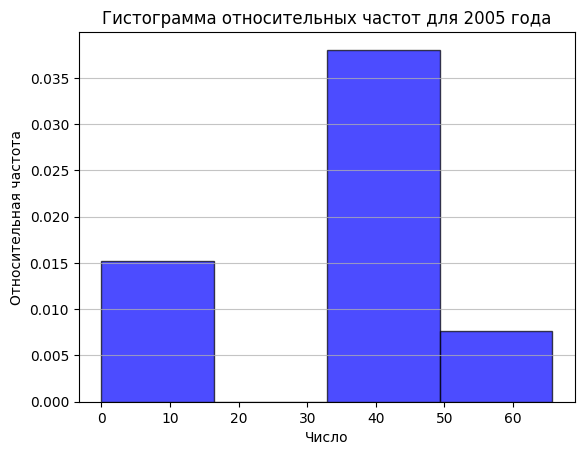

{'mean': 34.987500000000004,
 'std': 21.84630618090848,
 'variance': 545.4412500000001,
 'quantiles': 0.25    28.125
 0.50    39.950
 0.75    48.250
 Name: 2005, dtype: float64,
 'min_value': 0.0,
 'max_value': 65.7}

In [28]:
statistics_and_build_histogram(x_2005, 2005)

Среднее для 2010 года: 35.475
Стандартное отклонение 2010 года: 22.351048633117866
Дисперсия 2010 года: 570.9364285714286
Квартили 2010 года:
0.25    28.425
0.50    40.250
0.75    47.650
Name: 2010, dtype: float64
Минимальное значение 2010 года: 0.0
Максимальное значение 2010 года: 68.2


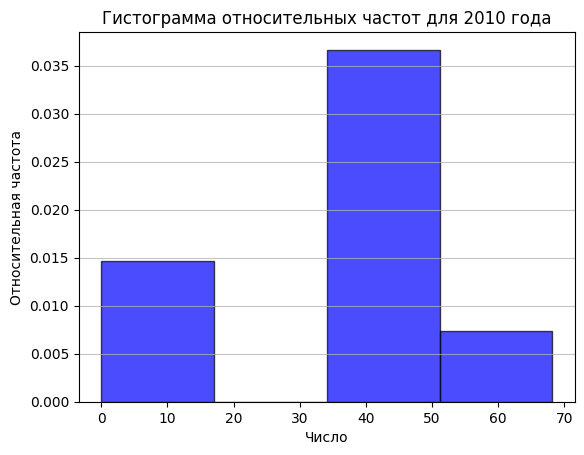

{'mean': 35.475,
 'std': 22.351048633117866,
 'variance': 570.9364285714286,
 'quantiles': 0.25    28.425
 0.50    40.250
 0.75    47.650
 Name: 2010, dtype: float64,
 'min_value': 0.0,
 'max_value': 68.2}

In [29]:
statistics_and_build_histogram(x_2010, 2010)

Среднее для 2015 года: 44.75
Стандартное отклонение 2015 года: 7.618562856602286
Дисперсия 2015 года: 66.3342857142857
Квартили 2015 года:
0.25    39.475
0.50    42.200
0.75    46.250
Name: 2015, dtype: float64
Минимальное значение 2015 года: 37.7
Максимальное значение 2015 года: 60.8


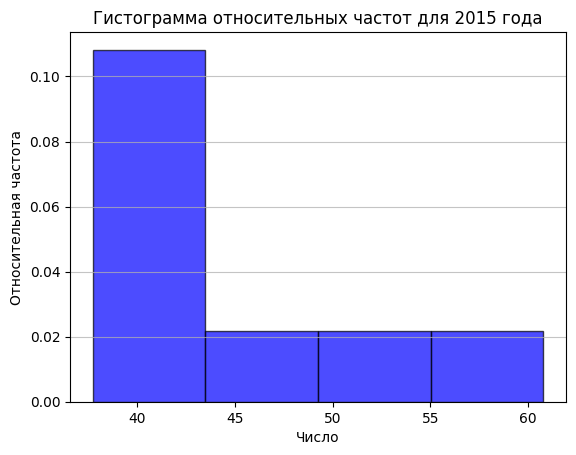

{'mean': 44.75,
 'std': 7.618562856602286,
 'variance': 66.3342857142857,
 'quantiles': 0.25    39.475
 0.50    42.200
 0.75    46.250
 Name: 2015, dtype: float64,
 'min_value': 37.7,
 'max_value': 60.8}

In [30]:
statistics_and_build_histogram(x_2015, 2015)

Среднее для 2019 года: 45.725
Стандартное отклонение 2019 года: 6.9580439061563855
Дисперсия 2019 года: 55.3307142857143
Квартили 2019 года:
0.25    42.225
0.50    44.800
0.75    46.600
Name: 2019, dtype: float64
Минимальное значение 2019 года: 37.1
Максимальное значение 2019 года: 61.2


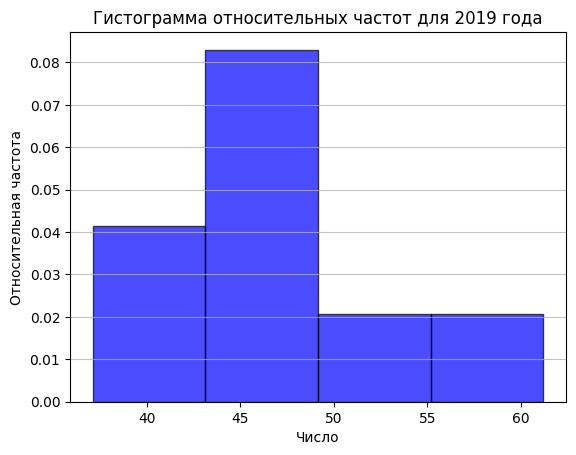

{'mean': 45.725,
 'std': 6.9580439061563855,
 'variance': 55.3307142857143,
 'quantiles': 0.25    42.225
 0.50    44.800
 0.75    46.600
 Name: 2019, dtype: float64,
 'min_value': 37.1,
 'max_value': 61.2}

In [31]:
statistics_and_build_histogram(x_2019, 2019)

Среднее для 2020 года: 46.3875
Стандартное отклонение 2020 года: 6.828330231469477
Дисперсия 2020 года: 53.28696428571429
Квартили 2020 года:
0.25    43.30
0.50    45.35
0.75    46.75
Name: 2020, dtype: float64
Минимальное значение 2020 года: 38.7
Максимальное значение 2020 года: 62.1


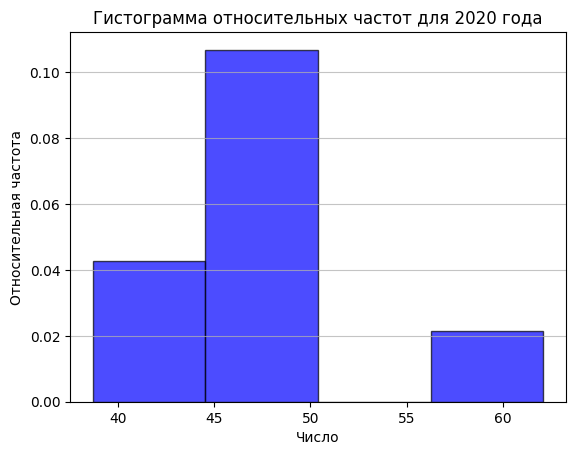

{'mean': 46.3875,
 'std': 6.828330231469477,
 'variance': 53.28696428571429,
 'quantiles': 0.25    43.30
 0.50    45.35
 0.75    46.75
 Name: 2020, dtype: float64,
 'min_value': 38.7,
 'max_value': 62.1}

In [32]:
statistics_and_build_histogram(x_2020, 2020)

Среднее для 2021 года: 46.625
Стандартное отклонение 2021 года: 5.971756441784946
Дисперсия 2021 года: 40.756428571428565
Квартили 2021 года:
0.25    43.625
0.50    46.400
0.75    48.200
Name: 2021, dtype: float64
Минимальное значение 2021 года: 39.1
Максимальное значение 2021 года: 59.4


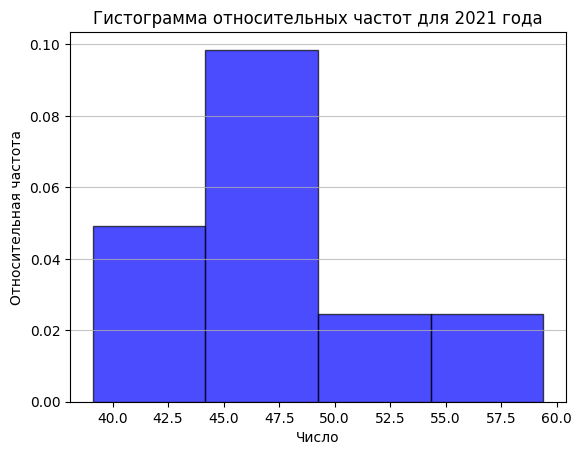

{'mean': 46.625,
 'std': 5.971756441784946,
 'variance': 40.756428571428565,
 'quantiles': 0.25    43.625
 0.50    46.400
 0.75    48.200
 Name: 2021, dtype: float64,
 'min_value': 39.1,
 'max_value': 59.4}

In [33]:
statistics_and_build_histogram(x_2021, 2021)

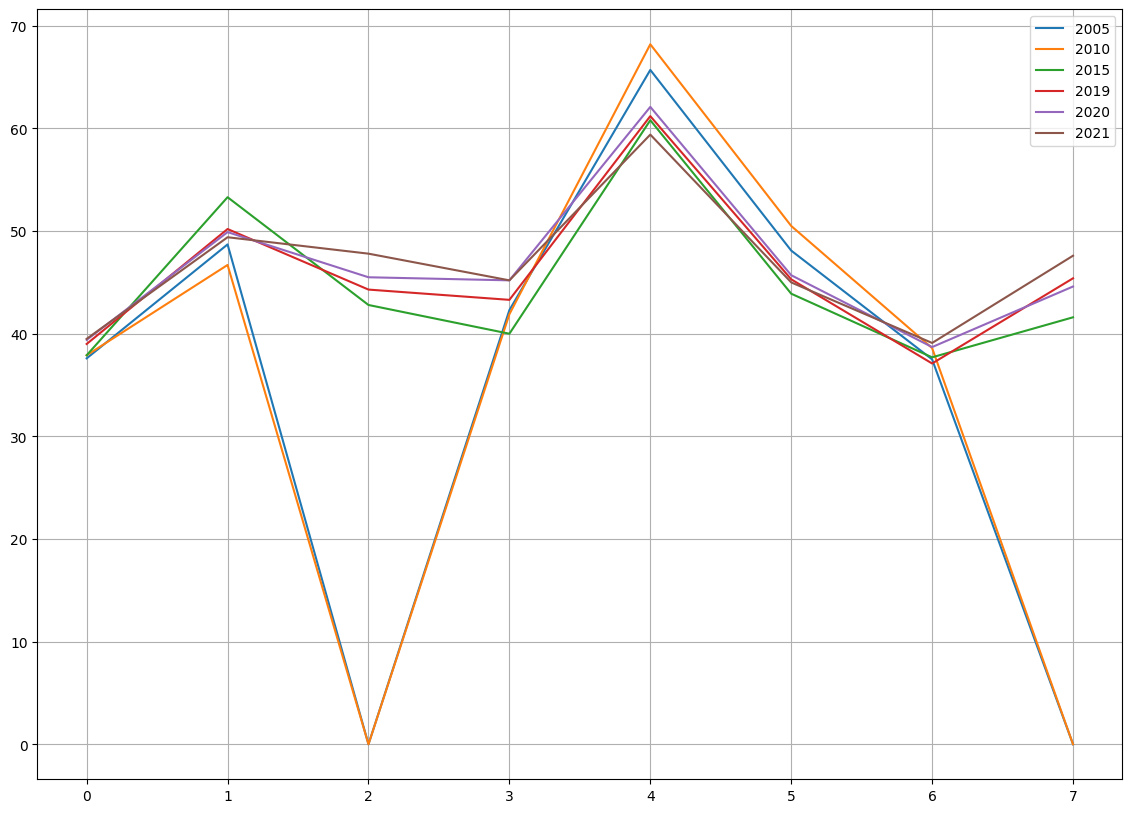

In [34]:
plt.figure(figsize=(14, 10))
plt.plot(x_2005)
plt.plot(x_2010)
plt.plot(x_2015)
plt.plot(x_2019)
plt.plot(x_2020)
plt.plot(x_2021)
plt.legend(["2005", "2010", "2015", "2019", "2020", "2021"])
plt.grid()
plt.show()

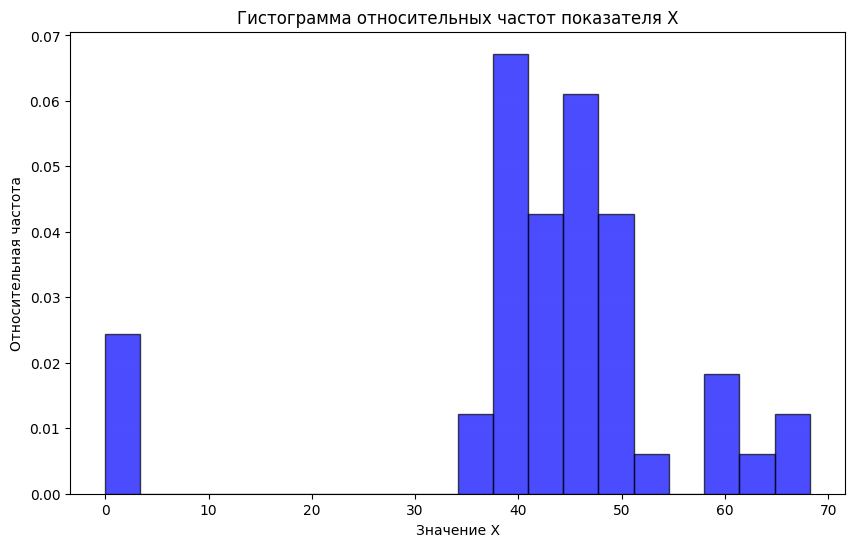

In [ ]:
# Извлечение данных по годам
x_values = pd.concat(
    [
        doc.iloc[:, 1],
        doc.iloc[:, 2],
        doc.iloc[:, 3],
        doc.iloc[:, 4],
        doc.iloc[:, 5],
        doc.iloc[:, 6],
    ]
)

# Построение гистограммы относительных частот
plt.figure(figsize=(10, 6))
plt.hist(x_values, bins=20, density=True, alpha=0.7, color="blue", edgecolor="black")
plt.title("Гистограмма относительных частот показателя X")
plt.xlabel("Значение X")
plt.ylabel("Относительная частота")
plt.grid(axis="y", alpha=0.75)
plt.show()

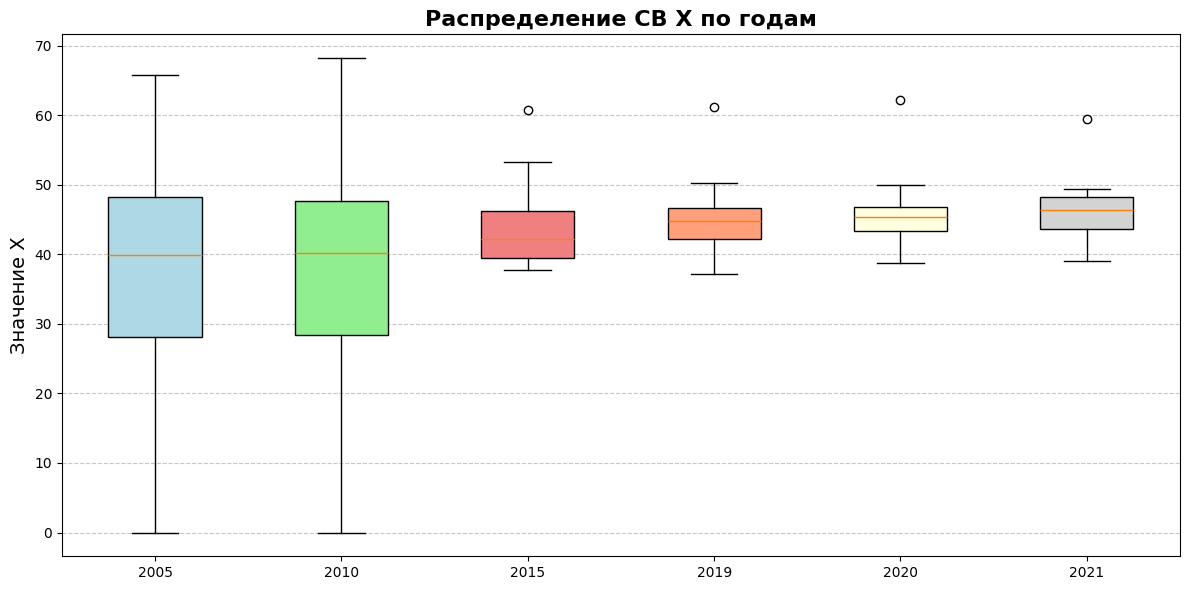

In [36]:
# Извлечение данных по годам
data = [
    doc.iloc[:, i] for i in range(1, 7)
]  # Измените индексы в зависимости от структуры вашего DataFrame

plt.figure(figsize=(12, 6))
box = plt.boxplot(data, patch_artist=True)

colors = [
    "lightblue",
    "lightgreen",
    "lightcoral",
    "lightsalmon",
    "lightyellow",
    "lightgrey",
]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

# Настройка заголовка и меток
plt.title("Распределение СВ X по годам", fontsize=16, fontweight="bold")
plt.xticks([1, 2, 3, 4, 5, 6], ["2005", "2010", "2015", "2019", "2020", "2021"])
plt.ylabel("Значение X", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Отображение графика
plt.tight_layout()
plt.show()

In [37]:
print(data)

[0    37.6
1    48.7
2     0.0
3    42.3
4    65.7
5    48.1
6    37.5
7     0.0
Name: 2005, dtype: float64, 0    37.9
1    46.7
2     0.0
3    41.9
4    68.2
5    50.5
6    38.6
7     0.0
Name: 2010, dtype: float64, 0    37.9
1    53.3
2    42.8
3    40.0
4    60.8
5    43.9
6    37.7
7    41.6
Name: 2015, dtype: float64, 0    39.0
1    50.2
2    44.3
3    43.3
4    61.2
5    45.3
6    37.1
7    45.4
Name: 2019, dtype: float64, 0    39.4
1    49.9
2    45.5
3    45.2
4    62.1
5    45.7
6    38.7
7    44.6
Name: 2020, dtype: float64, 0    39.5
1    49.4
2    47.8
3    45.2
4    59.4
5    45.0
6    39.1
7    47.6
Name: 2021, dtype: float64]


    Проверка нормальности

In [38]:
data = [doc.iloc[:, i] for i in range(1, 7)]

for x in data:
    stat, p_value = stats.shapiro(x)
    print(f"Статистика: {stat}, p-значение: {p_value} для {x.name} года")
    if p_value > ALPHA:
        print("Распределение нормально.\n")
    else:
        print("Распределение не нормально.\n")

Статистика: 0.8592724800109863, p-значение: 0.11808555573225021 для 2005 года
Распределение нормально.

Статистика: 0.8699908256530762, p-значение: 0.15069825947284698 для 2010 года
Распределение нормально.

Статистика: 0.8272131681442261, p-значение: 0.055529043078422546 для 2015 года
Распределение нормально.

Статистика: 0.8883131742477417, p-значение: 0.2257031351327896 для 2019 года
Распределение нормально.

Статистика: 0.8388722538948059, p-значение: 0.07333799451589584 для 2020 года
Распределение нормально.

Статистика: 0.9018092155456543, p-значение: 0.2999610900878906 для 2021 года
Распределение нормально.



    Выделить те года с нормально распределенными значениями рядов данных, где Xt1- Xtm имеют одинаковую дисперсию. Использовать для проверки нулевой гипотезы о равенстве дисперсий тесты Бартлетта и Левена

In [39]:
stats.bartlett(x_2005, x_2010, x_2015, x_2019, x_2020, x_2021)

BartlettResult(statistic=25.705582596992436, pvalue=0.00010176606762597082)

In [40]:
stats.levene(x_2005, x_2010, x_2015, x_2019, x_2020, x_2021)

LeveneResult(statistic=2.484727897273109, pvalue=0.04648862072640629)

    Проверить, можно ли считать, что среднее значение показателя X по Уральскому ФО в каждый год периода t1-tm значимо выше (ниже) общероссийского значения показателя X. Использовать для проверки гипотезы о равенстве средних t-тест для 1 выборки

In [49]:
data_all = pd.read_excel("CHISLO_DOCTORS.xlsx", sheet_name="ITOG")
data_all = data_all[0:1]
data_all

,Итог,2005,2010,2015,2019,2020,2021
0,Российская Федерация,48.6,50.1,45.9,48.7,50.4,51.0


In [50]:
x = data_all.iloc[0, 1:]
x = np.array(x, dtype="float")
x_2005_all = x[0]
x_2010_all = x[1]
x_2015_all = x[2]
x_2019_all = x[3]
x_2020_all = x[4]
x_2021_all = x[5]

In [51]:
def compare_averages(x):
    mean_fo = np.mean(x)
    print(f"{x.name}: {mean_fo}")
    mean_Russia = float(data_all[x.name])
    print(f"{x.name} in Russia: {mean_Russia}")
    if mean_fo < mean_Russia:
        print("Используем less\n")
    elif mean_Russia < mean_fo:
        print("Используем greater\n")
    else:
        print("Используем to-side\n")

In [52]:
compare_averages(x_2005)
compare_averages(x_2010)
compare_averages(x_2015)

2005: 34.987500000000004
2005 in Russia: 48.6
Используем less

2010: 35.475
2010 in Russia: 50.1
Используем less

2015: 44.75
2015 in Russia: 45.9
Используем less



C:\Users\михаил\AppData\Local\Temp\ipykernel_9164\2737836531.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_Russia = float(data_all[x.name])


In [54]:
compare_averages(x_2019)
compare_averages(x_2020)
compare_averages(x_2021)

2019: 45.725
2019 in Russia: 48.7
Используем less

2020: 46.3875
2020 in Russia: 50.4
Используем less

2021: 46.625
2021 in Russia: 51.0
Используем less



C:\Users\михаил\AppData\Local\Temp\ipykernel_9164\2737836531.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_Russia = float(data_all[x.name])


    Проверить значимость отличий средних в выбранной группе

In [55]:
### If pvalue>alpha => H_0 adopted
### If pvalue<=alpha => H_0 rejected and H_1 adopted
res = stats.ttest_1samp(x_2005, x_2005_all, alternative="less")
print(f"2005: {res}")

res = stats.ttest_1samp(x_2010, x_2010_all, alternative="less")
print(f"2010: {res}")

res = stats.ttest_1samp(x_2015, x_2015_all, alternative="less")
print(f"2015: {res}")

res = stats.ttest_1samp(x_2019, x_2019_all, alternative="less")
print(f"2019: {res}")

res = stats.ttest_1samp(x_2020, x_2020_all, alternative="less")
print(f"2020: {res}")

res = stats.ttest_1samp(x_2021, x_2021_all, alternative="less")
print(f"2021: {res}")

2005: TtestResult(statistic=-1.6485757099449858, pvalue=0.071612058509546, df=7)
2010: TtestResult(statistic=-1.7311989947078377, pvalue=0.06351396849956428, df=7)
2015: TtestResult(statistic=-0.3993684983628547, pvalue=0.35076297365014053, df=7)
2019: TtestResult(statistic=-1.1312245591685481, pvalue=0.14761112229234763, df=7)
2020: TtestResult(statistic=-1.5547105625795206, pvalue=0.08198219574149361, df=7)
2021: TtestResult(statistic=-1.9383178297284662, pvalue=0.04688349050806668, df=7)


    Проверить, можно ли считать, что различия между средними значениями показателя X по Уральскому ФО в какие-то два года из периода t1-tm незначимы, появились случайно. Использовать для проверки гипотезы о равенстве средних t-тест для 2 выборок

In [56]:
mean_2005 = statistics_and_build_histogram(x_2005, 2005, 0)["mean"]
S_2005 = statistics_and_build_histogram(x_2005, 2005, 0)["variance"]
nobs_2005 = len(x_2005)

mean_2010 = statistics_and_build_histogram(x_2010, 2010, 0)["mean"]
S_2010 = statistics_and_build_histogram(x_2010, 2010, 0)["variance"]
nobs_2010 = len(x_2010)

mean_2015 = statistics_and_build_histogram(x_2015, 2015, 0)["mean"]
S_2015 = statistics_and_build_histogram(x_2015, 2015, 0)["variance"]
nobs_2015 = len(x_2015)

mean_2019 = statistics_and_build_histogram(x_2019, 2019, 0)["mean"]
S_2019 = statistics_and_build_histogram(x_2019, 2019, 0)["variance"]
nobs_2019 = len(x_2019)

mean_2020 = statistics_and_build_histogram(x_2020, 2020, 0)["mean"]
S_2020 = statistics_and_build_histogram(x_2020, 2020, 0)["variance"]
nobs_2020 = len(x_2020)

mean_2021 = statistics_and_build_histogram(x_2021, 2021, 0)["mean"]
S_2021 = statistics_and_build_histogram(x_2021, 2021, 0)["variance"]
nobs_2021 = len(x_2021)

res = stats.ttest_ind_from_stats(
    mean1=mean_2005,
    std1=S_2005,
    nobs1=nobs_2005,
    mean2=mean_2010,
    std2=S_2010,
    nobs2=nobs_2010,
)
print(f"2005, 2010: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2005,
    std1=S_2005,
    nobs1=nobs_2005,
    mean2=mean_2015,
    std2=S_2015,
    nobs2=nobs_2015,
)
print(f"2005, 2015: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2005,
    std1=S_2005,
    nobs1=nobs_2005,
    mean2=mean_2019,
    std2=S_2019,
    nobs2=nobs_2019,
)
print(f"2005, 2019: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2005,
    std1=S_2005,
    nobs1=nobs_2005,
    mean2=mean_2020,
    std2=S_2020,
    nobs2=nobs_2020,
)
print(f"2005, 2020: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2005,
    std1=S_2005,
    nobs1=nobs_2005,
    mean2=mean_2021,
    std2=S_2021,
    nobs2=nobs_2021,
)
print(f"2005, 2021: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2010,
    std1=S_2010,
    nobs1=nobs_2010,
    mean2=mean_2015,
    std2=S_2015,
    nobs2=nobs_2015,
)
print(f"2010, 2015: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2010,
    std1=S_2010,
    nobs1=nobs_2010,
    mean2=mean_2019,
    std2=S_2019,
    nobs2=nobs_2019,
)
print(f"2010, 2019: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2010,
    std1=S_2010,
    nobs1=nobs_2010,
    mean2=mean_2020,
    std2=S_2020,
    nobs2=nobs_2020,
)
print(f"2010, 2020: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

2005, 2010: Ttest_indResult(statistic=-0.0017462653790710735, pvalue=0.9986313217522194)
Различия между средними значениями показателя X в какие-то два года незначимы X => принимаем H0
2005, 2015: Ttest_indResult(statistic=-0.050253913100581554, pvalue=0.9606299983990477)
Различия между средними значениями показателя X в какие-то два года незначимы X => принимаем H0
2005, 2019: Ttest_indResult(statistic=-0.055395827719934586, pvalue=0.9566059189291178)
Различия между средними значениями показателя X в какие-то два года незначимы X => принимаем H0
2005, 2020: Ttest_indResult(statistic=-0.058835461729815464, pvalue=0.9539147282078777)
Различия между средними значениями показателя X в какие-то два года незначимы X => принимаем H0
2005, 2021: Ttest_indResult(statistic=-0.06017937422348689, pvalue=0.9528633994446835)
Различия между средними значениями показателя X в какие-то два года незначимы X => принимаем H0
2010, 2015: Ttest_indResult(statistic=-0.04564145723774653, pvalue=0.96424067289

In [57]:
res = stats.ttest_ind_from_stats(
    mean1=mean_2010,
    std1=S_2010,
    nobs1=nobs_2010,
    mean2=mean_2021,
    std2=S_2021,
    nobs2=nobs_2021,
)
print(f"2010, 2021: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2015,
    std1=S_2015,
    nobs1=nobs_2015,
    mean2=mean_2019,
    std2=S_2019,
    nobs2=nobs_2019,
)
print(f"2015, 2019: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2015,
    std1=S_2015,
    nobs1=nobs_2015,
    mean2=mean_2020,
    std2=S_2020,
    nobs2=nobs_2020,
)
print(f"2015, 2020: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2015,
    std1=S_2015,
    nobs1=nobs_2015,
    mean2=mean_2021,
    std2=S_2021,
    nobs2=nobs_2021,
)
print(f"2015, 2021: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )
res = stats.ttest_ind_from_stats(
    mean1=mean_2019,
    std1=S_2019,
    nobs1=nobs_2019,
    mean2=mean_2020,
    std2=S_2020,
    nobs2=nobs_2020,
)
print(f"2019, 2020: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2019,
    std1=S_2019,
    nobs1=nobs_2019,
    mean2=mean_2021,
    std2=S_2021,
    nobs2=nobs_2021,
)
print(f"2019, 2021: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

res = stats.ttest_ind_from_stats(
    mean1=mean_2020,
    std1=S_2020,
    nobs1=nobs_2020,
    mean2=mean_2021,
    std2=S_2021,
    nobs2=nobs_2021,
)
print(f"2020, 2021: {res}")
if res[1] > ALPHA:
    print(
        "Различия между средними значениями показателя X в какие-то "
        "два года незначимы X => принимаем H0"
    )
else:
    print(
        "Различия между средними значениями показателя X в какие-то два года значимы X => отвергаем H0"
    )

2010, 2021: Ttest_indResult(statistic=-0.05509705255925032, pvalue=0.9568397088646479)
Различия между средними значениями показателя X в какие-то два года незначимы X => принимаем H0
2015, 2019: Ttest_indResult(statistic=-0.03192493177482424, pvalue=0.9749825925780589)
Различия между средними значениями показателя X в какие-то два года незначимы X => принимаем H0
2015, 2020: Ttest_indResult(statistic=-0.054433326634924215, pvalue=0.9573590855037684)
Различия между средними значениями показателя X в какие-то два года незначимы X => принимаем H0
2015, 2021: Ttest_indResult(statistic=-0.06811809883872923, pvalue=0.9466549432773097)
Различия между средними значениями показателя X в какие-то два года незначимы X => принимаем H0
2019, 2020: Ttest_indResult(statistic=-0.02439318400120325, pvalue=0.980883265608514)
Различия между средними значениями показателя X в какие-то два года незначимы X => принимаем H0
2019, 2021: Ttest_indResult(statistic=-0.03704231307844318, pvalue=0.9709742762985893

    Проверить значимость отличий средних в выбранной группе. Использовать для проверки гипотезы о равенстве средних групп тест Тьюки и односторонний тест ANOVA

In [58]:
res = stats.tukey_hsd(x_2005, x_2010, x_2021, x_2015, x_2019, x_2020, x_2021)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.487     1.000   -22.012    21.037
 (0 - 2)    -11.637     0.644   -33.162     9.887
 (0 - 3)     -9.762     0.802   -31.287    11.762
 (0 - 4)    -10.737     0.724   -32.262    10.787
 (0 - 5)    -11.400     0.665   -32.925    10.125
 (0 - 6)    -11.637     0.644   -33.162     9.887
 (1 - 0)      0.487     1.000   -21.037    22.012
 (1 - 2)    -11.150     0.688   -32.675    10.375
 (1 - 3)     -9.275     0.837   -30.800    12.250
 (1 - 4)    -10.250     0.764   -31.775    11.275
 (1 - 5)    -10.913     0.709   -32.437    10.612
 (1 - 6)    -11.150     0.688   -32.675    10.375
 (2 - 0)     11.637     0.644    -9.887    33.162
 (2 - 1)     11.150     0.688   -10.375    32.675
 (2 - 3)      1.875     1.000   -19.650    23.400
 (2 - 4)      0.900     1.000   -20.625    22.425
 (2 - 5)      0.237     1.000   -21.287    21.762
 (2 - 6)      0.000     1.000   

In [61]:
res = stats.f_oneway(x_2005, x_2010, x_2021, x_2015, x_2019, x_2020, x_2021)
print(res)

F_onewayResult(statistic=1.1492569249567954, pvalue=0.3486433047351561)
